In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC

In [5]:
url= 'creditcard.csv'
df = pd.read_csv(url)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
sizes = df['Class'].value_counts().values
labels = df['Class'].unique()


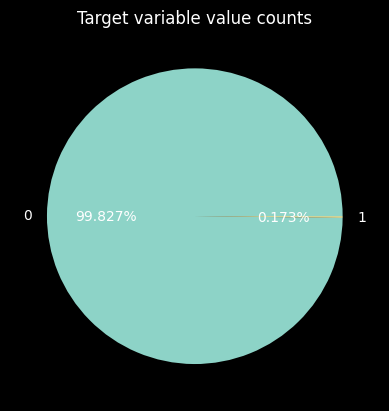

In [7]:
plt.style.use('dark_background')
fig, ax = plt.subplots()
ax.pie(sizes,labels = labels, autopct='%1.3f%%')
plt.title('Target variable value counts')
plt.show()


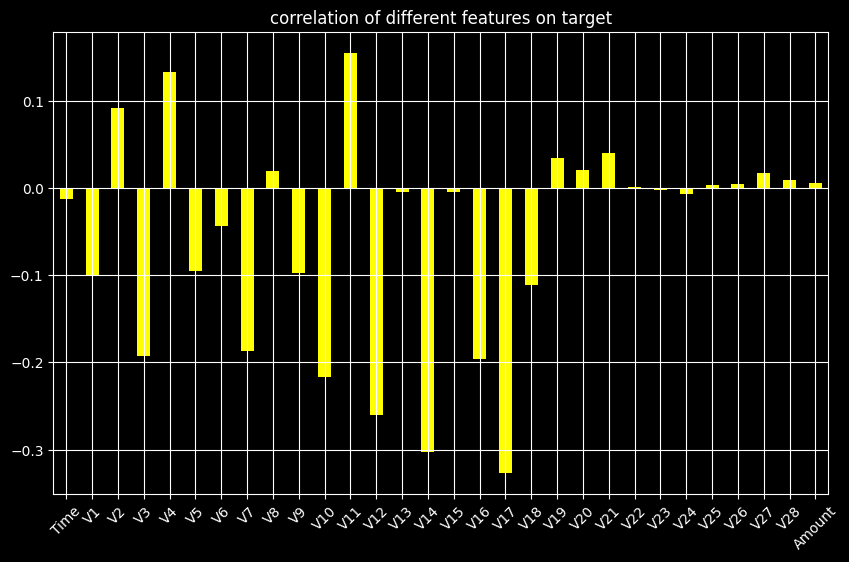

In [8]:
correlated_feat = df.corr()['Class'].drop('Class')
plt.style.use('dark_background')
correlated_feat.plot(kind = 'bar', figsize=(10,6),color='yellow' )

plt.xticks(rotation=45)
plt.grid(True)
plt.title('correlation of different features on target')
plt.show()

In [9]:
#df.iloc[:, 1:30] =  StandardScaler().fit_transform(df.iloc[:,1:30])
data_matrix = df.values      #gives values row-wise
X = data_matrix[:,1:30]
y = data_matrix[:,30]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# weight(i) = n(samples)/(n(classes)*no.of times that class repeats)

this is the formula for balanced 
​


In [11]:
w_train = compute_sample_weight('balanced', y_train)

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=4, random_state=35)
dt.fit(X_train, y_train, sample_weight=w_train)


DecisionTreeClassifier(max_depth=4, random_state=35)

In [13]:
y_pred = dt.predict_proba(X_test)[:,1]

# 📖 Decision Tree Splitting Metrics

When building a Decision Tree, we decide at each node which feature to split on. To measure the **"quality" of a split**, we use criteria like **Gini Impurity** and **Information Gain (based on Entropy)**.

---

## 📌 Gini Impurity

**Gini Impurity** measures the probability of incorrectly classifying a randomly chosen element from the dataset if we randomly assign a label according to the class distribution in a node.

### 📖 Formula:


Gini(t) = 1 - ∑(pᵢ)²

Where:
- `C` = number of classes
- `pᵢ` = proportion of class `i` instances in the node

### 📊 Example:
If a node has:
- 4 samples of class 0
- 6 samples of class 1

Then:


Gini = 1 - (0.4² + 0.6²) = 1 - (0.16 + 0.36) = 0.48

**Entropy** measures the level of uncertainty (or disorder) in a node.
**Lower Entropy = purer node**

---

## 📌 Information Gain (Entropy Gain)

**Information Gain** measures the reduction in entropy after splitting a node.  
The split that results in the highest information gain is chosen.


The AUC-ROC score evaluates your model's ability to distinguish positive and negative classes considering all possible probability thresholds. The higher its value, the better the model is considered for separating the two classes of values.


In [14]:
roc_auc_score(y_test, y_pred)

np.float64(0.9525060094371953)

In [15]:
svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)
svm.fit(X_train, y_train)


c:\Users\Adarsh Yerneni\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

this is hinge loss
| Scenario                        | Value of $1 - y \cdot \hat{y}$ | Loss |
| :------------------------------ | :----------------------------- | :--- |
| Correct, far enough from margin | Negative or zero               | 0    |
| Correct, but inside margin      | Positive                       | > 0  |
| Misclassified                   | Positive                       | > 0  |


In [18]:
y_predictions = svm.decision_function(X_test)
y_predictions

array([-16.60910483, -45.67431719,  -4.05434891, ..., -17.62184874,
        -0.64151976,  -1.81056063], shape=(85443,))

so of we have a function 2x+3z-4 = y^
and we put a point 3,1 the resultant value is the decision score.
The point lies 5 units away from the decision boundary

It’s on the positive side (since 5 is positive)

It’s well beyond the margin (since it’s greater than 1)

In [19]:
roc_auc_score(y_test, y_predictions)


np.float64(0.7352268002281035)

In [25]:
#finding top6 features to train the model on.
df.corr()['Class'].sort_values(ascending=False).head(7)

Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
Name: Class, dtype: float64

In [35]:
#training the model on these feats
data = df[['V11', 'V4', 'V2', 'V21', 'V19', 'V20','Class']].values
X = data[:,0:6]
y = data[:,6]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=69,  test_size=0.3)


In [38]:
w_train1 = compute_sample_weight('balanced', y_train)
dt1 = DecisionTreeClassifier(max_depth=4, random_state=69)
dt1.fit(X_train1, y_train1, sample_weight=w_train)

DecisionTreeClassifier(max_depth=4, random_state=69)

In [ ]:
probabilities = dt1.predict_proba(X_test1)[:,1]
roc_auc_score(y_test1,probabilities)


np.float64(0.8987095965812074)

: 